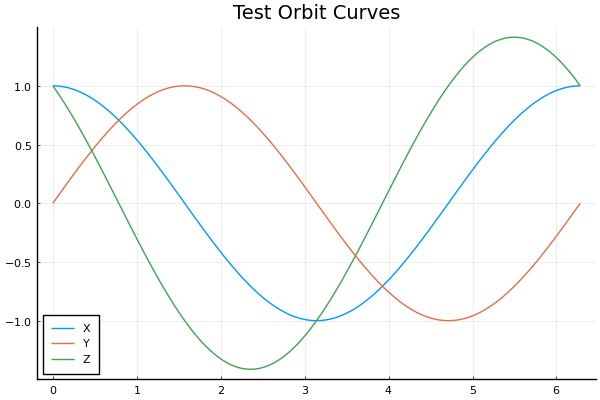

In [1]:
# The purpose of this code here is to test the cubic spline interpolation using orbit-like values (sines)

using Plots
pyplot()

x = range(0,stop=2*pi,length=101) # using three sine mixes for fake orbits
f = cos.(x)
g = sin.(x)
h = cos.(x) - sin.(x)
pos =[f g h]'

#size(pos)

plot(x,pos',title = "Test Orbit Curves", label = ["X" "Y" "Z"])



In [3]:
time_old = x
time_new = range(pi/2, stop = pi, length = 50)
display(["pos = " size(pos)])
display(["time_old = " size(time_old)])
display(["time_new = " size(time_new)])


1×2 Array{Any,2}:
 "pos = "  (3, 101)

1×2 Array{Any,2}:
 "time_old = "  (101,)

1×2 Array{Any,2}:
 "time_new = "  (50,)

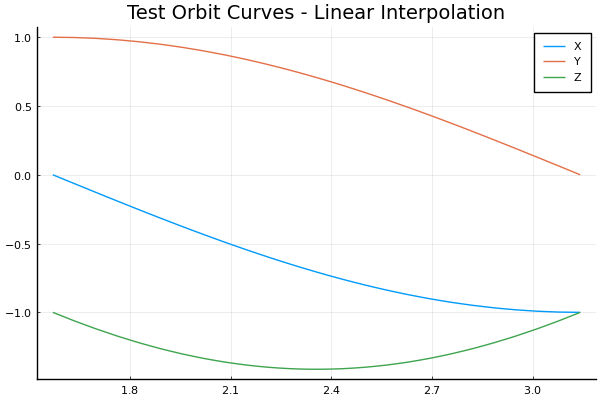

In [4]:
#import Pkg; Pkg.add("Interpolations")
using Interpolations


#"interpolate darts orbits"
#function interp_orbit(time_old, pos, time_new)
    #pos = 3 x N_plat x N_time
    szp = size(pos)
    @assert szp[1]==3 "POS needs to be 3 x [Np x Nt] or 3 x Nt"
    if ndims(pos) == 3
        nplat = szp[2]
    elseif ndims(pos) == 2
        nplat = 1
    end

    if nplat == 1

    pos_i_lin = zeros(szp[1],length(time_new));
        for iplat=1:nplat
            for iaxis=1:szp[1]
                #TODO: using CubicSplineInterpolation instead of Linear Interpolations
                itp = LinearInterpolation(time_old, pos[iaxis, :])
                pos_i_lin[iaxis,:] = itp(time_new);
            end
        end 
    
    
else
    pos_i_lin = zeros(szp[1],nplat, length(time_new));
        for iplat=1:nplat
            for iaxis=1:szp[1]
                #TODO: using CubicSplineInterpolation instead of Linear Interpolations
                itp = LinearInterpolation(time_old, pos[iaxis, iplat, :])
                pos_i_lin[iaxis,iplat,:] = itp(time_new);
            end
        end
end

#  return pos_i
#end

plot(time_new,pos_i_lin',title = "Test Orbit Curves - Linear Interpolation", label = ["X" "Y" "Z"])

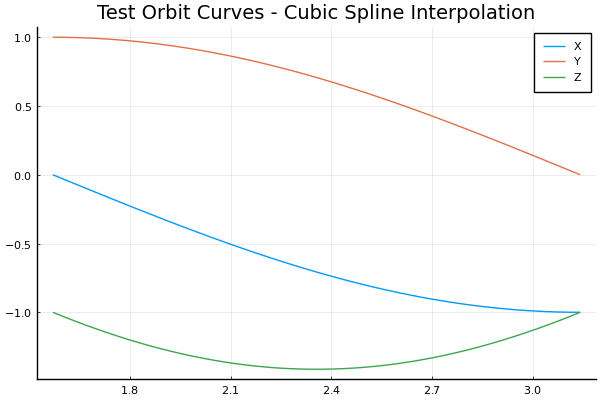

In [5]:
#testing now with cubic splines
using Interpolations


#"interpolate darts orbits"
#function interp_orbit(time_old, pos, time_new)
    #pos = 3 x N_plat x N_time
    szp = size(pos)
    @assert szp[1]==3 "POS needs to be 3 x [Np x Nt] or 3 x Nt"
    if ndims(pos) == 3
        nplat = szp[2]
    elseif ndims(pos) == 2
        nplat = 1
    end

    if nplat == 1
    @assert szp[2]>=8 "Nt must have at least 8 points"
    pos_i_cube = zeros(szp[1],length(time_new));
        for iplat=1:nplat
            for iaxis=1:szp[1]
                #TODO: using CubicSplineInterpolation instead of Linear Interpolations
                # itp = LinearInterpolation(time_old, pos[iaxis, :])
                # testing cubic CubicSplineInterpolation
                itp = CubicSplineInterpolation(time_old, pos[iaxis, :])
                pos_i_cube[iaxis,:] = itp(time_new); # this stays as "pos_i" in the real code
            end
        end 
    
    
else
    @assert szp[3]>=8 "Nt must have at least 8 points"
    pos_i_cube = zeros(szp[1],nplat, length(time_new));
        for iplat=1:nplat
            for iaxis=1:szp[1]
                #TODO: using CubicSplineInterpolation instead of Linear Interpolations
                #itp = LinearInterpolation(time_old, pos[iaxis, iplat, :])
                # testing cubic CubicSplineInterpolation
                itp = CubicSplineInterpolation(time_old, pos[iaxis, iplat, :])
                pos_i_cube[iaxis,iplat,:] = itp(time_new);
            end
        end
end

#  return pos_i
#end

plot(time_new,pos_i_cube',title = "Test Orbit Curves - Cubic Spline Interpolation", label = ["X" "Y" "Z"])

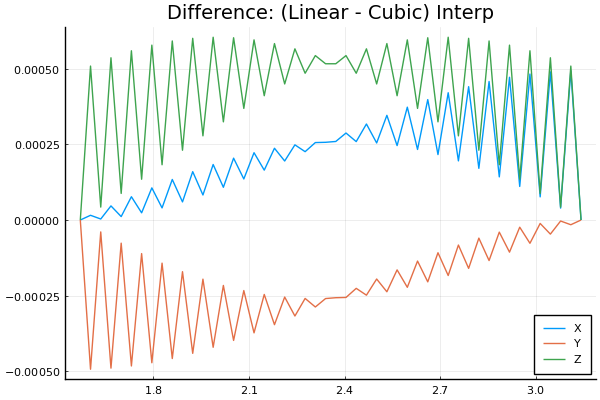

In [34]:
# Compare the differences between the cubic and linear interpolations
plot(time_new, (pos_i_lin - pos_i_cube)',title = "Difference: (Linear - Cubic) Interp",label = ["X" "Y" "Z"])

In [6]:
# testing N-spacecraft, assigning new variable N just for testing
N = 5 # spacecraft
posN = zeros(size(pos,1),N,size(pos,2))

for i=1:N # lame way to do it
    posN[:,i,:] = pos;
end

#double check correct size
size(posN)

(3, 5, 101)

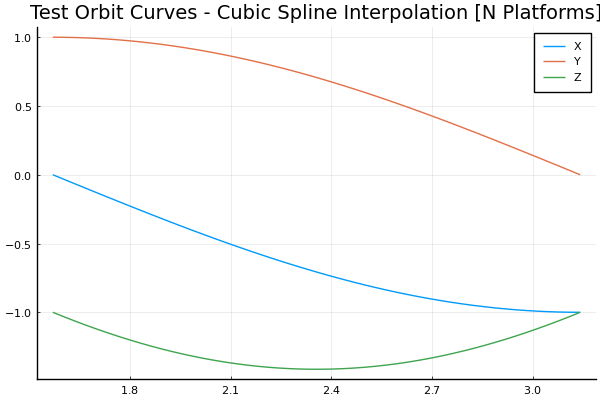

In [8]:
#testing now with cubic splines
using Interpolations

pos = posN; # sets the multi-spacecraft position variable (posN) to the input variable (pos)
#"interpolate darts orbits"
#function interp_orbit(time_old, pos, time_new)
    #pos = 3 x N_plat x N_time
    szp = size(pos)
    @assert szp[1]==3 "POS needs to be 3 x [Np x Nt] or 3 x Nt"
    if ndims(pos) == 3
        nplat = szp[2]
    elseif ndims(pos) == 2
        nplat = 1
    end

    if nplat == 1

    pos_i_cube = zeros(szp[1],length(time_new));
        for iplat=1:nplat
            for iaxis=1:szp[1]
                # testing cubic CubicSplineInterpolation
                itp = CubicSplineInterpolation(time_old, pos[iaxis, :])
                pos_i_cube[iaxis,:] = itp(time_new);
            end
        end 
    
    
else
    pos_i_cube = zeros(szp[1],nplat, length(time_new));
        for iplat=1:nplat
            for iaxis=1:szp[1]
                # testing cubic CubicSplineInterpolation
                itp = CubicSplineInterpolation(time_old, pos[iaxis, iplat, :])
                pos_i_cube[iaxis,iplat,:] = itp(time_new);
            end
        end
end

#  return pos_i
#end
plot(time_new,pos_i_cube[:,N,:]',title = "Test Orbit Curves - Cubic Spline Interpolation [N Platforms]", label = ["X" "Y" "Z"])

In [ ]:
plot()